# **Graph Theory: A Primer** - Part 1

<a href="https://www.cbs.mpg.de/en/cbs-coconut">CBS CoCoNUT @ MPI CBS</a>, April 2021

(c) Mina Jamshidi (jamshidi@cbs.mpg.de) (<a href="https://github.com/minajamshidi/Python-Tutorials/tree/master/GraphTheory/CoCoNUT-April2021">GitHub</a>)

Mathematicians call it a *graph*. Scientists call it a *network*. Nowadays, there are many toolboxes that do network analysis and compute various graph metrics with automatic or semi-automatic pipelines from raw data. Therefore, in many cases, scientists do not need to be able to code the complex anaysis and unfortunately this results, in some cases, in a lack of knowledge of what those automatic pipelines do and as a consequence, diagnosing the analysis problems are almost impossible.

Here, we will approach graphs from the very starting point and get to know the basic, but still important, mathematical tools to work with graphs. After this tutorial, most of us will still use the available toolboxes for their analysis, with a better insight to our analysis pipelines though :-)


Before starting, let's import some Python packages that we will be using.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Let's start with the historical root of graph theory:

**Example 1.1.1 (The Königsberg Bridge Problem)**: The city of Koeningsberg was located on the Pregel river in Prussia. The city occupied two islands and the areas on the two banks. The regions of the city were linked by seven bridges. The citizens wondered whether they can leave home, cross every bridge exactly once, and return home. 

The problem of Königsberg Bridge is equivalent to the problem of  traversing the figure on the right side of Figure 1, with the dots being the lands and the lines representing the bridges. 

This problem suggested a general model for assessing such questions - which resulted in the graph theory.


<table><tr>
<td> <img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/Konigsberg_bridges.png" width="250"> </td>
<td> <img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/7_bridges.svg" width="300"> </td>
<td> <img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/K%C3%B6nigsberg_graph.svg" width="300"> </td>
</tr></table>



Figure 1.1.1: Left: The map of Koeningsberg and its bridges. Middle: Simplified scheme of Koeningsberg. Right: the equivalet graph with the dots being the lands and the lines representing the bridges. Figures are taken from [1].





**Example 1.1.2 (Structural and functional brain networks)**: we can build  structural and functional networks from brain data
<img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/brain_networks_Bullmore_Sporns_2009.png" width="1000"> 

Figure 1.1.2: Structural and functional brain networks can be explored using graph theory through the following four steps (see the figure):

• Define the network nodes. These could be defined as electroencephalography or multielectrode-array electrodes, or as anatomically defined regions of histological, MRI or diffusion tensor imaging data.

• Estimate a continuous measure of association between nodes. This could be the spectral coherence or Granger causality measures between two magnetoencephalography sensors, or the connection probability between two regions of an individual diffusion tensor imaging data set, or the inter-regional correlations in cortical thickness or volume MRI measurements estimated in groups of subjects.

• Generate an association matrix by compiling all pairwise associations between nodes and (usually) apply a threshold to each element of this matrix to produce a binary adjacency matrix or undirected graph.

• Calculate the network parameters of interest in this graphical model of a brain network and compare them to the equivalent parameters of a population of random networks. (c) Text and Figure from [2]

---


## Definition of a Graph
**Definition 1.1 (graph)**: A graph $G=(V, E)$ is a set of nodes (or vertices) $V$ accompanied by a set of edges $E \subset V\times V$ which connect these nodes to each other. For two nodes $v_1, v_2 \in V$, an edge between these two notes is denoted by an ordered or unordered pair $(v_1, v_2)$. 

**Example 1.2**: Figure 1.2 shows two drawings of a simple graph with $V=\{u, x, v, w, y\}$ and $E=\{uv, ux, uw, vx, vw, xw, xy\}$. Note that in this *undirected* graph the order of the nodes in an edge in $E$ is not important. 

<img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/example1.2.jpg" width="400"> 

Figure 1.2: two drawings of a graph. Figures from [3].


**Definition 1.2 (weighted graph)**: The link between two edges can be binary, i.e. it either exists (1) or not (0). In figure 1.3-a, a simple binary unweighted graph is depicted. The links can also be weighted, meaning that each existing edge has a weight. In this definition, the non-existing edges have a weight of zero. Additionally, an unweighted graph is a special form of a weighted graph, where the weights of the edges are either 1 or 0.
Figure 1.3-b illustrates a weighted graph.

**Definition 1.3 (directed graph)**: If all of the edges in a graph are directed, then the graph is called directed graph. If all the links are undirected, it is called undirected. In definition 1.1 of a graph, the set of the edges of a directed graph consists of ordered pairs of nodes. For example, in figure 1.3-c below, $(v_1, v_2)$ denotes the edge from $v_1$ to $v_2$, while $(v_2, v_1)$ denotes the edge which starts from $v_2$ and enters $v_1$. 

You can think of the WWW as a directed graph, each website is a node and can point (or link) to another website.


<img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/graph_types.svg" width="800">

Figure 1.3: illustrations of different types of graphs

For the rest of this tutorial, unless explicitly mentioned, we work with undirected, unweighted graphs.

**Definition 1.3 (complete graph)**: A complete graph is a graph that has a link between any two nodes. Figure 1.3-d shows a complete graph with five nodes. Therefore, a complete graph with $n$ nodes has $\frac{n(n-1)}{2}$ edges.


**<font color='red'>Exercise 1.1</font>**: why does a complete graph have $\frac{n(n-1)}{2}$ edges?

[Answer to Ex. 1.1](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex1-1.txt)

<font color='gray'> Your answer to Ex 1.1 : </font>
....


---

## How do we store graphs?

Refering to definition 1.1, a first approach to store and represent graphs is saving the nodes set $V$ and the set of edges $E$ as pairs. For example for the left panel of figure 1.3 we have:


```
V = [1, 2, 3, 4, 5]

E = [(1, 2), (1, 4), (2, 3), (3, 5), (4, 5)]
```

This is a clever approach (regardin used memory space) for sparse graphs, i.e. graph which have a few number of edges in comparison to the number of all possible edges.

Another approach that is being used in textbooks and can give us the opportunity to analyse graph as an algebraic structure is the *adjacency matrix* of a graph.

**Definition 1.4 (adjacency matrix)**: A graph $G=(V, E)$ with $|V|=n$ nodes can be represented by means of an $n\times n$ matrix. The element $(i, j)$ of this matrix is 1 if there is a link between node $i$ and $j$, otherewise it is zero. For weighted graphs, the element $(i, j)$ of the adjacency matrix is equal to the weight of this link.

**Example 1.3**: The graph in figure 1.3-a can be represented with the matrix below:

$A = \begin{bmatrix}
0 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0
\end{bmatrix}
$

An important property of undirected graphs is that their adjacency matrix is symmetric, i.e. the $(i, j)$ element is equal to $(j, i)$ element.


**<font color='red'>Exercise 1.2</font>**: Write the adjacency matrix of the graph in figure 1.3-a as a numpy array in the code cell below. Example 1.3 gives you the matrix in the written format. The aim is here to write it as a numpy array.
 
<font color='gray'>*Python Tip*: The below code builds a numpy array for the matrix
$A = \begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}$ </font>.

```
A = np.array([[1, 2], [3, 4]])
```

[Answer to Ex. 1.2](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex1-2.txt)

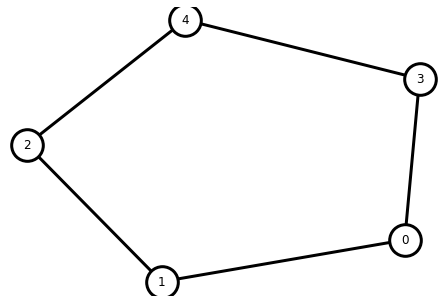

In [ ]:
# Exercise 1.2 ************************
# A = 
#*****************************

G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True, node_color= 'white', edgecolors='black', 
        node_size=1000, linewidths=3, width=3)

---- 
## The degree of a node

**Definition 1.5 (degree of a node)** 
* For an undirected, unweighted graph, the degree of a node is defined as the number of edges that are connected to it, which equals to the number of its neighbors. 
* For a weighted graph, the degree of a node is equal to the sum of the weights of the links connected to that node.
* For a directed graph, we can define inward and outward degrees, meaning how many links enter to or exit from the node. It can be also generalized to weighted, directed graphs.

Assume that the undirected graph $G=(V, E)$, with n nodes, has an adjacency matrix $A$. Then the degree of node $i$ can be formulated as:
$d_i = \sum_{j=1}^{n} A_{ij}$





**<font color='red'>Exercise 1.3</font>**: Use the adjacency matrix and compute the degree of each node in the graph $G$ which is generated below. The matrix $A$ is the adjacency matrix of $G$. Compare the degree values that are printed with the depiction of the graph and the number of neighbors of each node.

[Answer to Ex. 1.3](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex1-3.txt)

degree:
  Node-00:  6
  Node-01:  6
  Node-02:  5
  Node-03:  4
  Node-04:  4
  Node-05:  5
  Node-06:  5
  Node-07:  5
  Node-08:  2
  Node-09:  3
  Node-10:  4
  Node-11:  7
  Node-12:  7
  Node-13:  4
  Node-14:  7
  Node-15:  6
  Node-16:  5
  Node-17:  5
  Node-18:  4
  Node-19:  2


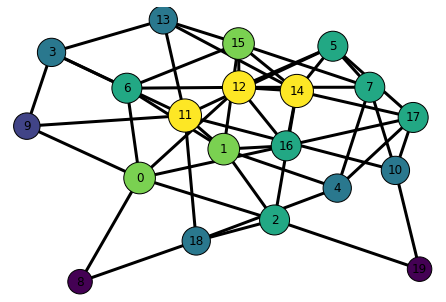

In [ ]:

G1 = nx.gnp_random_graph(20, 0.2, seed=12345)
A = nx.to_numpy_array(G1) # the adjacency matrix of graph G

# Exercise 1.3 ****************
# compute the degree of the nodes in d, which is an an array of size n_nodes with the i-th element being the degree of node i
# d = 
print("degree:", *[f"Node-{i:02d}:  {int(j)}" for i, j in enumerate(d)], sep="\n  ")
#*****************************

# draw the graph. The degree of a node is reflected in its color and its size
pos = nx.spring_layout(G1, seed=5678910)
nx.draw(G1, pos, with_labels=True, node_color=d, edgecolors='black', 
        node_size=(d+4)*100, linewidths=1, width=3)



An important property of a network is the degree distribution of its nodes. From the degree distribution we can learn how often each degree occurs in the graph. In the following we build a random graph and plot it:

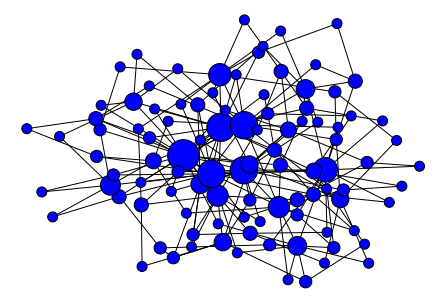

In [ ]:
# G = nx.gnp_random_graph(100, 0.05, seed=123456789)
G = nx.barabasi_albert_graph(100, 2, seed=123456789)
G = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
A = nx.to_numpy_array(G)

# Exercise 1.3 ****************
# compute the degree of the nodes of G.

# d = 
#*****************************

pos = nx.spring_layout(G, seed=5678910)
nx.draw(G, pos, with_labels=False, node_color='blue', edgecolors='black', 
                 node_size=d*50, linewidths=1, width=1)


In the illustration above, we coded the size of a node with its degree value. that is, a node which has a larger size, has a larger degree.

**<font color='red'>Exercise 1.4:</font>** plot the histogram of the node degrees.

Note that here, for the sake of simplicity of coding, we ignore the difference of a histogram and distribution.

[Answer to Ex. 1.4](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex1-4.txt)

(array([ 0.,  0., 49., 19., 12.,  3.,  4.,  3.,  1.,  2.,  1.,  0.,  1.,
         0.,  0.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 21 Patch objects>)

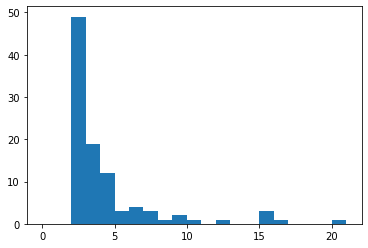

In [ ]:
# Exercise 1.4 ****************
# plt.hist(
#*****************************


In the histogram that you plotted, you can see that there are many nodes with degrees smaller than 5, and only a few nodes with large degrees, here larger than 15. You can also see this property already in the illustration of the graph above. The nodes with largest size have the largest degree values. You can imagin that the nodes which have many neighbors are playing important roles in the graph. for example, if this is graph of a computer network, then those nodes with large degrees are the computers which are connected to many other computers and therefore, they have an important role in transfering information in the network. This concept is called *centrality*, aiming at finding the nodes which are most central in the network, or in other words, giving each node an index which defines the amount of the centrality of that node in the network. The nodes with highest centrality in the graph are called **hubs** of the newtork. Therefore, some times the centrality index is also called the *hubness of the node*. We will learn more about the centrality measures in next session.

One of the measure of centrality is the degree of the nodes. In this sense, a node which is connected to many other nodes is a hub. In the following  exercise, you will determin the 5 hubs of our toy network.

**<font color='red'>Exercise 1.5:</font>**: In the figure above, you can see clearly that some nodes are having exceptionaly high degrees. find the top 5 hubs and plot them on the graph drawing.


[Answer to Ex. 1.5](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex1-5.txt)


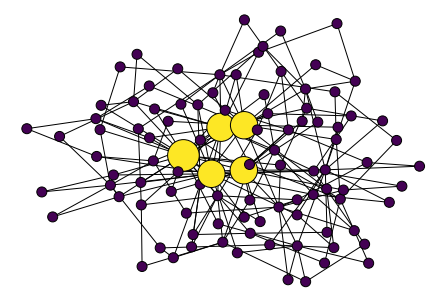

In [ ]:
#Exercise 1.5 ***********************

# find the index of the hubs, i.e. the nodes with higher degrees
# for this first sort the degree values and save the sort arguments. 

# ind_sorted = np.argsort(
# ind_hubs = 

# what is the number of nodes of this graph? get this information from the adjacency matrix

# n_nodes = 
#***********************************

node_size = np.ones((n_nodes,)) * 100
node_size[ind_hubs] = d[ind_hubs] * 50


node_color = np.ones((n_nodes,))
node_color[ind_hubs] = 2

pos = nx.spring_layout(G, seed=5678910)
nx.draw(G, pos, with_labels=False, node_color=node_color, edgecolors='black', 
                 node_size=node_size, linewidths=1, width=1)

The histogram already gives information about the distribution of the degree values. However, it is usually important how probable is that we get nodes that have degrees higher than a specific value, i.e. $p(degree>k)$. This distribution is called *complementary cumulative distribution (cCDF)*

To get this, we use *cumulative distribution (CDF)*, which gives us information on how probable is to get a node with degree less than or equal to k, i.e. $p(degree\leq k)$. This value can be computed using summing the height of the bins of the histogram from 0 to k, and then deviding it by the number of nodes. Then $p(degree>k)=1-p(degree\leq k)$.


**<font color='red'>Exercise 1.6:</font>** for the graph G above, plot the complementary cumulative distribution, i.e. $p(degree>k)$. Since we have discrete possible values for the degree of the nodes, plot this probability for all possible $k$s, this is reflected in the parameter *bins* of the histogram method from numpy library.

Note that we plot the cCDF in a log-log scheme.

[Answer to Ex. 1.6](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex1-6.txt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


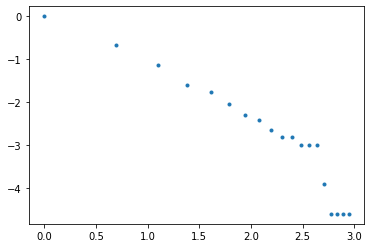

In [ ]:
h, b = np.histogram(d, bins=np.arange(0, np.max(d)+2, 1))

#Exercise 1.6 ***********************

# plt.plot(np.log(), np.log(), '.')

#***********************************

In the figure above, you can see two points:

* the log-log relationship of the degrees and their repective probabilities (i.e. $k$ and $p(degree>k)$) is linear for this graph. This is not by chance! The random graph that we produced for these exercises follows a model called *Barbasi-Albert* model. These types of graphs have degree distributions which follow a power-law property, i.e. $p(degree=k) \propto k^{-\gamma}$. And this is very interesting since this property has been linked to systems operating at a  critical states. There are already discussion how the degree distribution of brain networks looks like. 

* There are five nodes which have degrees much larger than the rest of the nodes. These nodes actually are the hibs of the network, which we extracted already in exercise 1.5.

References

[1] https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg

[2] Bullmore & Sporns, 2009, 'Complex brain networks: graph theoretical analysis of structural and functional systems', Nature Reviews Neuroscience.

[3] Douglas B. West, Introduction to Graph Theory, Pearson Education inc. 